My goal is to see if US treasury Bonds, GDP and Stock Market Volatility have predictive power on stock market returns. 

I am able to pull the data I need I am just not able to merge all of the data into the same dataframe. Below resides daily pricing data for the SP500, US treasury Bonds, the quarterly % change in US GDP, and the VIX volatility index along with associated EDA for each dataset.

In [12]:
from iexfinance import get_historical_data
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [17]:
path = Path('assets', 'data','stock_data.csv')
px_data = pd.read_csv(path)

In [18]:
px_data.head()

,Date,SPX INDEX,10 YR GOVT BONDS,VIX INDEX,TIPS ETF
0,1/2/2008,1447.16,3.9033,23.17,106.64
1,1/3/2008,1447.16,3.8918,22.49,107.00
2,1/4/2008,1411.63,3.8651,23.94,106.97
3,1/7/2008,1416.18,3.8311,23.79,106.95
4,1/8/2008,1390.19,3.7822,25.43,107.03


In [19]:
px_data.dtypes

Date                 object
SPX INDEX           float64
10 YR GOVT BONDS    float64
VIX INDEX           float64
TIPS ETF            float64
dtype: object

In [20]:
px_data.shape

(2707, 5)

In [21]:
px_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 5 columns):
Date                2707 non-null object
SPX INDEX           2707 non-null float64
10 YR GOVT BONDS    2707 non-null float64
VIX INDEX           2707 non-null float64
TIPS ETF            2707 non-null float64
dtypes: float64(4), object(1)
memory usage: 105.8+ KB


In [22]:
px_data.describe()

,SPX INDEX,10 YR GOVT BONDS,VIX INDEX,TIPS ETF
count,2707.000000,2707.000000,2707.000000,2707.000000
mean,1693.471810,2.598639,19.737373,111.445059
std,550.467483,0.675515,9.769739,5.811859
min,676.530000,1.357900,9.140000,90.730000
25%,1254.395000,2.056300,13.420000,108.100000
50%,1614.420000,2.489300,16.810000,112.220000
75%,2090.555000,3.017300,22.640000,114.635000
max,2930.750000,4.266600,80.860000,123.300000


In [23]:
px_data.isnull().sum()

## There is no missing data within the data set

Date                0
SPX INDEX           0
10 YR GOVT BONDS    0
VIX INDEX           0
TIPS ETF            0
dtype: int64

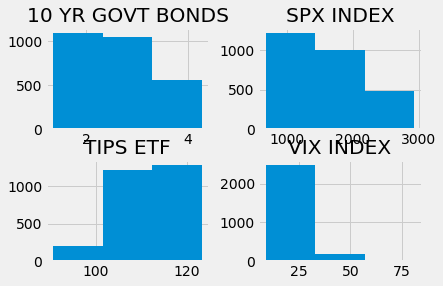

In [34]:
axes = px_data.hist(bins=3);

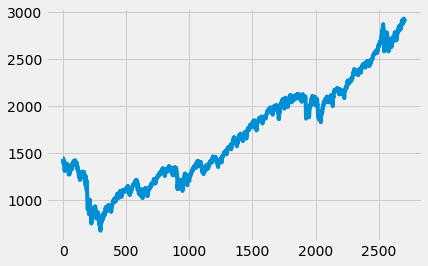

In [31]:
ax = px_data.loc[:,'SPX INDEX'].plot()

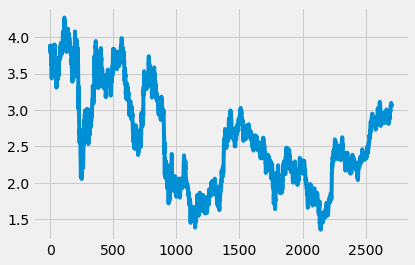

In [32]:
ax = px_data.loc[:,'10 YR GOVT BONDS'].plot()

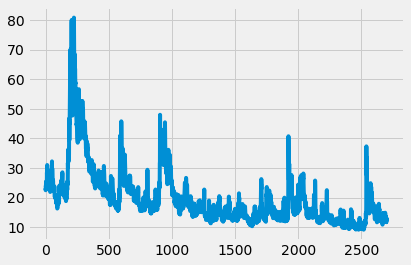

In [36]:
ax = px_data.loc[:,'VIX INDEX'].plot()

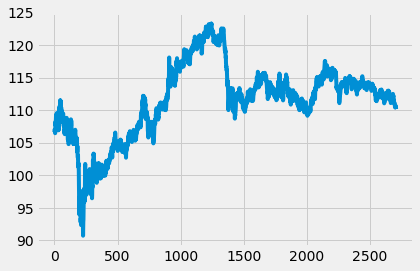

In [38]:
ax = px_data.loc[:,'TIPS ETF'].plot()

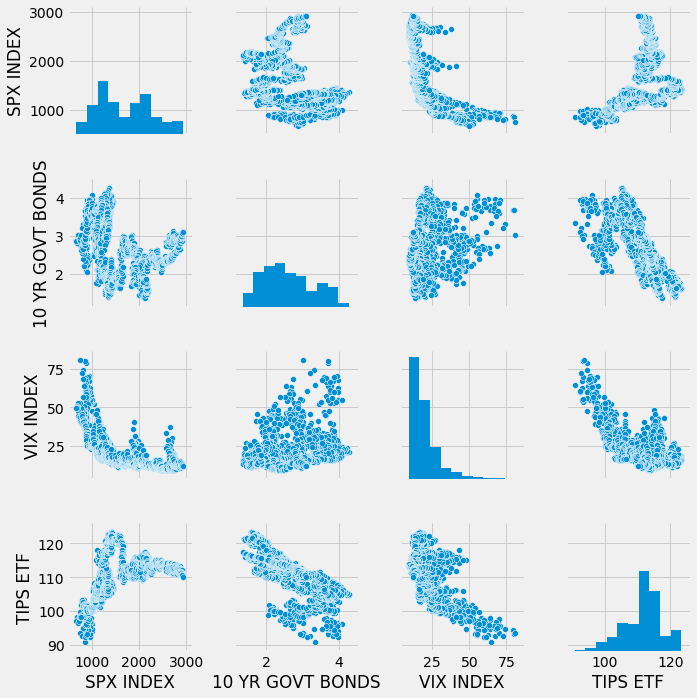

In [35]:
g = sns.pairplot(px_data)

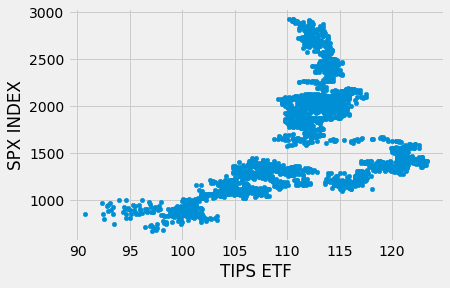

In [41]:
ax = px_data.plot(x='TIPS ETF', y='SPX INDEX', kind='scatter')

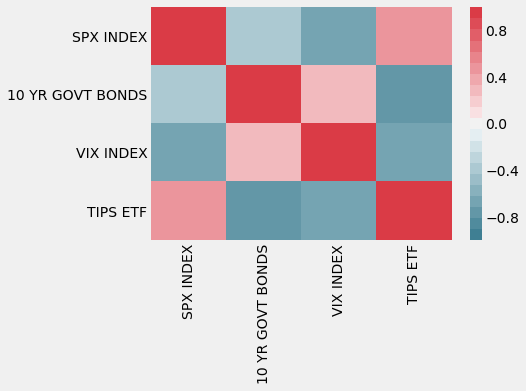

In [40]:
ax = sns.heatmap(px_data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

Please ignore the below this is advance work for the next project deliverable

In [57]:
forecast_out = int(30) # predicting 30 days into future
px_data['Prediction'] = px_data[['close']].shift(-forecast_out) #  label column with data shifted 30 units up

In [58]:
X = np.array(px_data.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [59]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

In [60]:
y = np.array(px_data['Prediction'])
y = y[:-forecast_out]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.957160693133158


In [63]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[290.70557726 291.05990641 291.77624617 294.43345729 294.54512552
 293.27723306 292.98394456 291.96374381 292.31108186 292.43346377
 293.7787419  293.37781163 293.96934141 292.71874236 290.90868785
 290.19584466 289.32142598 283.69756907 277.04082501 280.35300948
 277.12077766 281.90599644 283.75585416 280.28501649 278.94441947
 278.36148671 276.09333439 270.86295964 272.15279077 268.17923768]


In [64]:
px_data.head()

,open,high,low,close,volume,Prediction
date,,,,,,
2016-01-04,190.0571,190.5690,188.2560,190.5588,222353534,182.8431
2016-01-05,190.9197,191.3937,189.6400,190.8818,110845849,182.0942
2016-01-06,188.0190,189.6495,187.3175,188.4740,152112604,182.0089
2016-01-07,185.1656,187.1658,183.5161,183.9522,213436073,184.6442
2016-01-08,185.0329,185.6585,181.6107,181.9359,209817228,182.3122


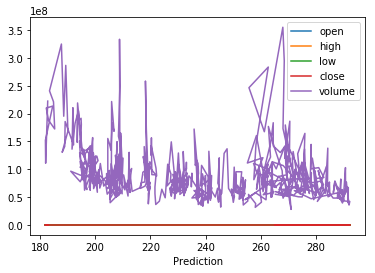

In [65]:
px_data.plot('Prediction');